Under the hood, many of the conversions are done using `astropy`. Unfortunately, `astropy` does not yet cover conversions to redshifts, and since I did not want to wait for this feature (and was too lazy to make a PR myself), I just wrote this quick package.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyhiframe import pyhiframe as hif

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

# Initiate the converter

In [18]:
converter = hif.HIConverter()

HI rest frequency in MHz

In [5]:
converter.nu0

1420.4058

`astropy` is used under the hood for many of the conversions.

In [6]:
print(converter.nu0_u)
print(converter.v_frame)

1420.4058 MHz
[(Unit("Hz"), Unit("km / s"), <function doppler_relativistic.<locals>.to_vel_freq at 0x1031198c8>, <function doppler_relativistic.<locals>.from_vel_freq at 0x10edb5378>), (Unit("Angstrom"), Unit("km / s"), <function doppler_relativistic.<locals>.to_vel_wav at 0x10ee59ea0>, <function doppler_relativistic.<locals>.from_vel_wav at 0x10ee59f28>), (Unit("eV"), Unit("km / s"), <function doppler_relativistic.<locals>.to_vel_en at 0x10eed0048>, <function doppler_relativistic.<locals>.from_vel_en at 0x10eed00d0>)]


# Start with some redshift-frequency conversions

In [7]:
nus = np.arange(800., 1400.)

In [8]:
zs = converter.nu2z(nus)

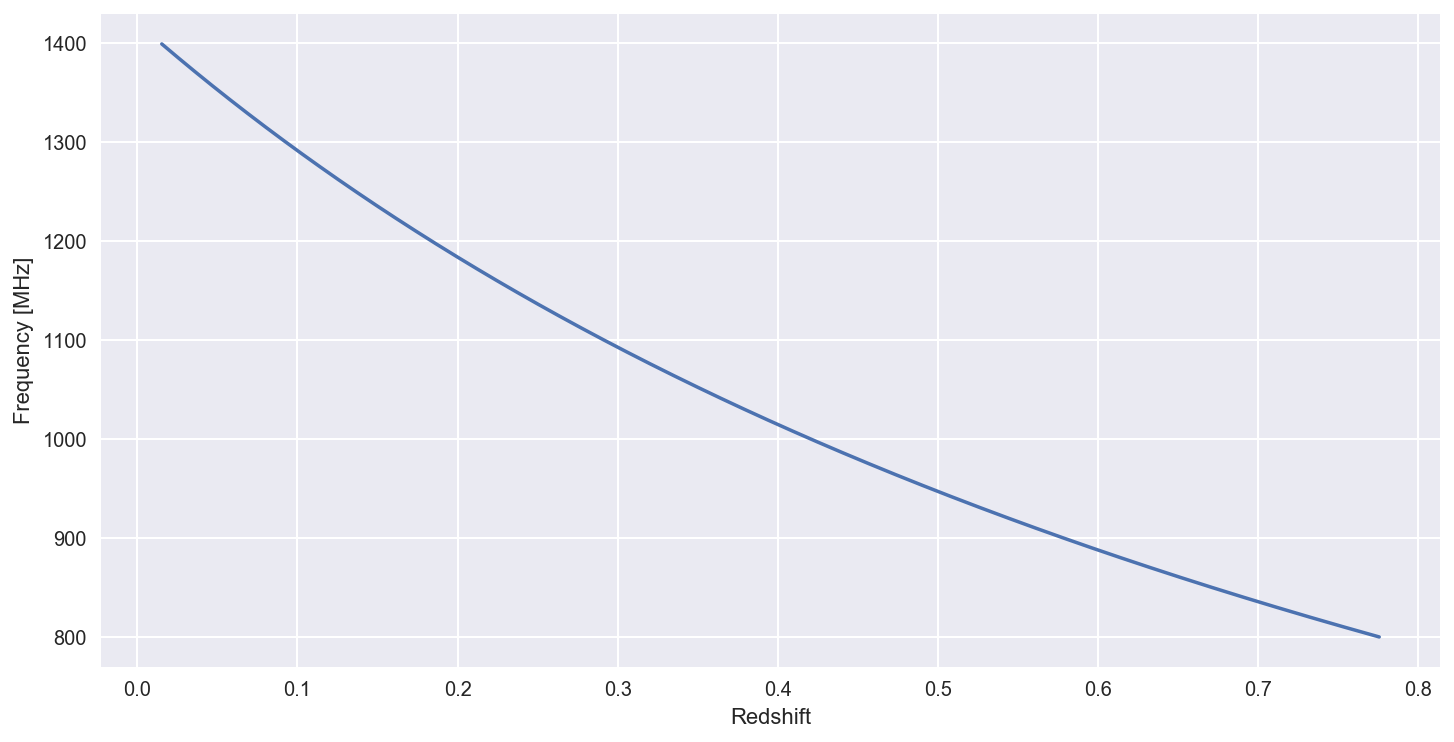

In [9]:
plt.plot(zs, nus)
pl.xlabel('Redshift')
pl.ylabel('Frequency [MHz]');

# Look at different definition of radial velocities

In [10]:
v_radio = hif.HIConverter(mode='radio').nu2velo(nus)
v_optical = hif.HIConverter(mode='optical').nu2velo(nus)
v_relativistic = hif.HIConverter(mode='relativistic').nu2velo(nus)

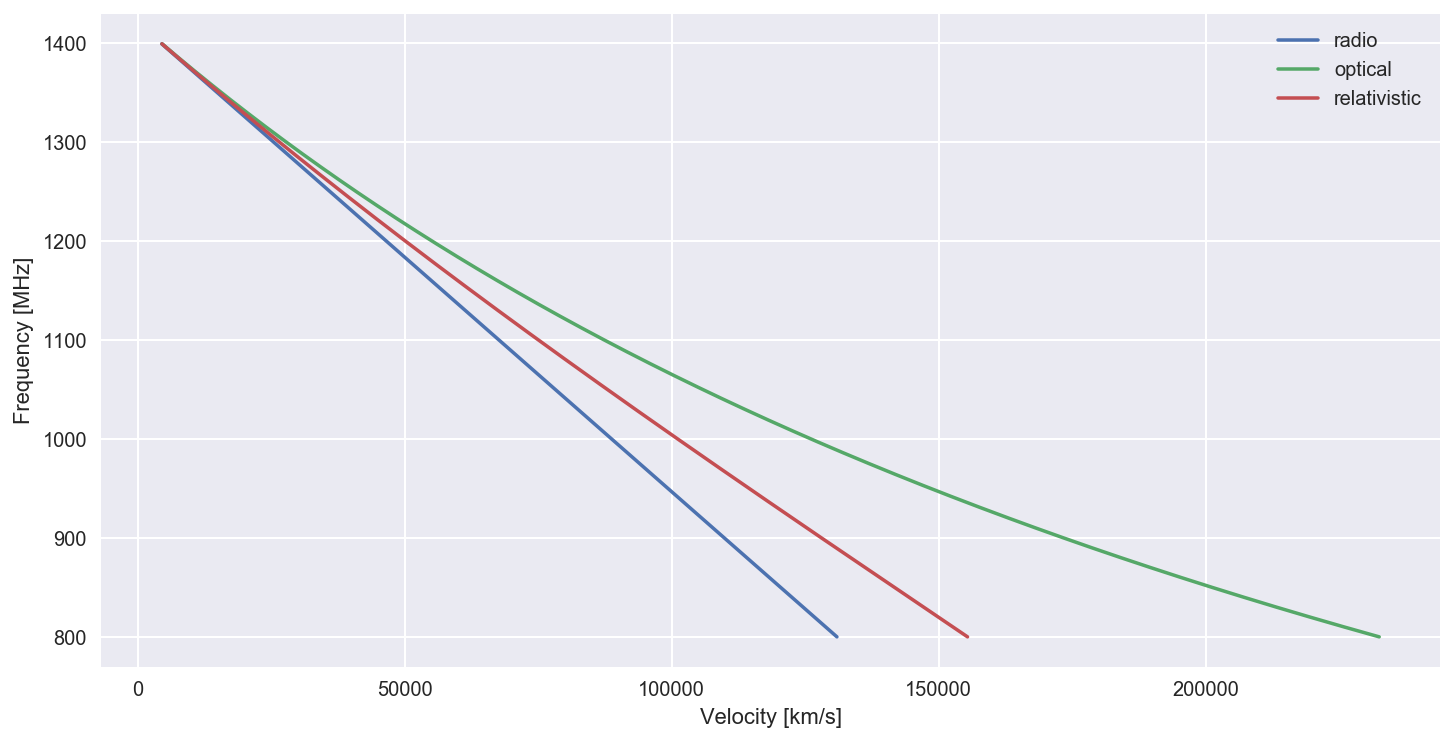

In [11]:
pl.plot(v_radio, nus, label='radio')
pl.plot(v_optical, nus, label='optical')
pl.plot(v_relativistic, nus, label='relativistic')
pl.legend()
pl.xlabel('Velocity [km/s]')
pl.ylabel('Frequency [MHz]');

# Local distance and proper luminosity distance

In [23]:
d_local = converter.z2d(zs, local=True)
d_cosmo = converter.z2d(zs, local=False)

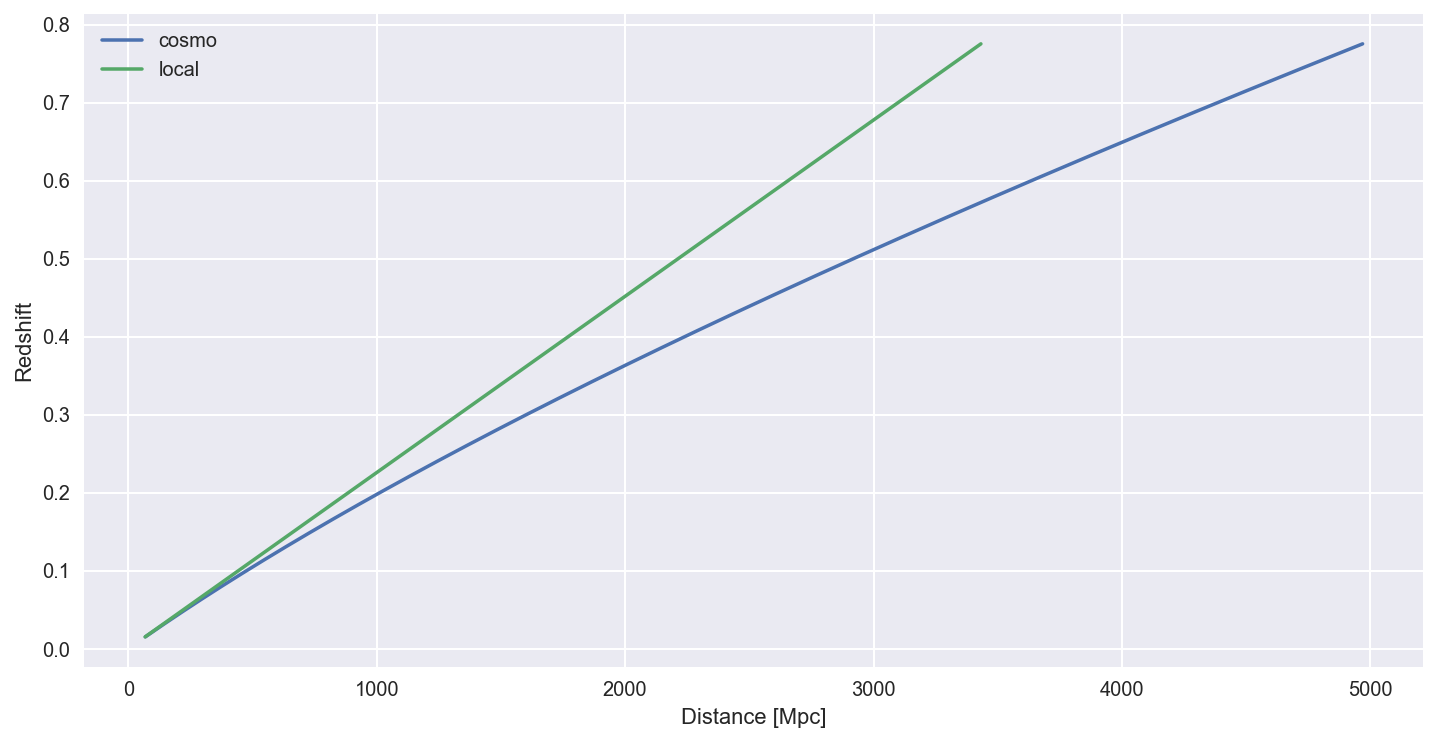

In [22]:
pl.plot(d_cosmo, zs, label='cosmo')
pl.plot(d_local, zs, label='local')
pl.legend()
pl.xlabel('Distance [Mpc]')
pl.ylabel('Redshift');